In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.tools import visualization
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import IBMQ
IBMQ.save_account('127713ca720abc93ebfc7b1056cea850aff5fa82b4617fa75de01472448cab3697df1f854ce503db01a689f41212d24d3d573e1df911bec0ed90a761e74702c0')

In [8]:
qc = QuantumCircuit(3, 2)
qc.draw()

In [13]:
qr = QuantumRegister(3, name = "qh")
cr = ClassicalRegister(2, name = "cl")
qc = QuantumCircuit(qr, cr)

qc.draw(output="text")

In [16]:
print(qc.qregs)
qc.cregs

[QuantumRegister(3, 'qh')]


[ClassicalRegister(2, 'cl')]

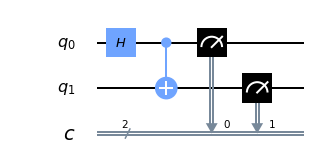

In [19]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)
bell.measure([0, 1], [0, 1])
bell.draw(output = "mpl")

In [20]:
from qiskit.circuit import Gate

my_gate = Gate(name = "Ga1", num_qubits=2, params = [])


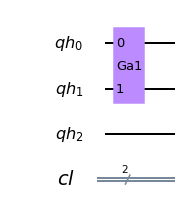

In [22]:
qr = QuantumRegister(3, name = "qh")
cr = ClassicalRegister(2, name = "cl")
qc = QuantumCircuit(qr, cr)
qc.append(my_gate, [qr[0], qr[1]])
qc.draw(output="mpl")

In [ ]:
sub_q = QauntumRegister(2)
sub_circ = QuantumCircuit(sub_q, name="sub_circ")
sub_circ.h(sub_q[0])
sub_circ

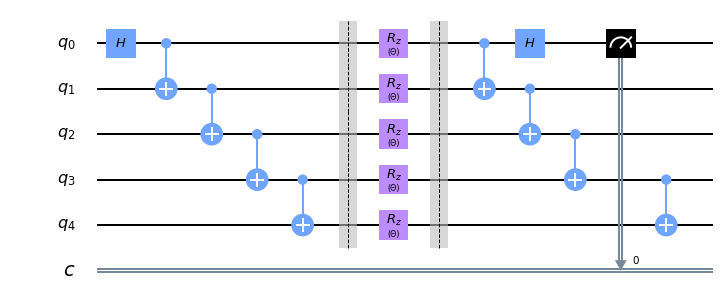

In [25]:
from qiskit.circuit import Parameter

theta = Parameter("Θ")

n = 5 
qc = QuantumCircuit(5, 1)

qc.h(0)

for i in range(n - 1):
    qc.cx(i, i+1)

qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in range (n - 1):
    qc.cx(i, i+1)
qc.h(0)

qc.measure(0, 0)

qc.draw(output = "mpl")

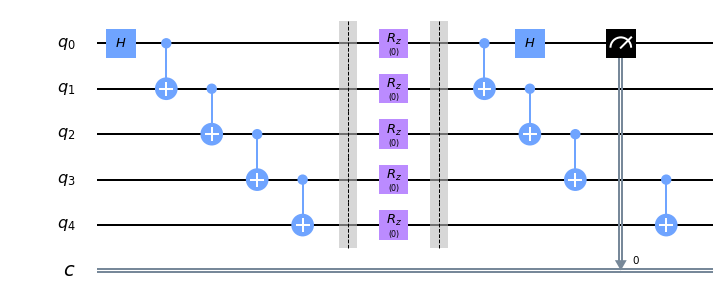

In [32]:
theta_range = np.linspace(0, 2*np.pi, 5)

circuits = [qc.bind_parameters({theta : theta_val}) for theta_val in theta_range]

circuits[0].draw(output="mpl")

In [33]:
from qiskit import Aer, execute

job = execute(qc, backend = Aer.get_backend("qasm_simulator"), parameter_binds = [{theta : theta_val} for theta_val in theta_range])
counts = [job.result().get_counts(i) for i in range(len(job.result().results))]

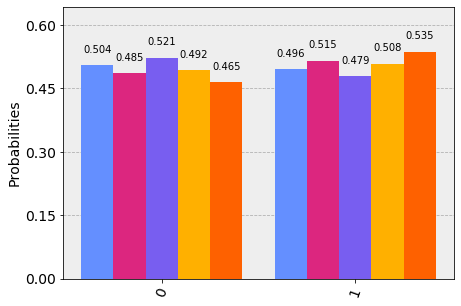

In [34]:
visualization.plot_histogram(counts)